In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
import geopy

In [3]:
with open('Data/stage3.csv',encoding='Latin1') as f:
    df=pd.read_csv(f, delimiter=',')

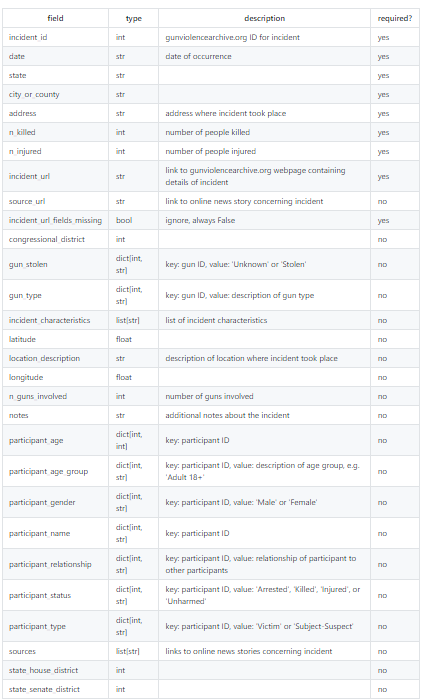

Important notes:

Each list is encoded as a string with separator ||. For example, "a||b" represents ['a', 'b'].

Each dict is encoded as a string with outer separator || and inner separator ::. For example, 0::a, 1::b represents {0: 'a', 1: 'b'}.

The "gun ID" and "participant ID" are numbers specific to a given incident that refer to a particular gun/person involved in that incident. For example, this:

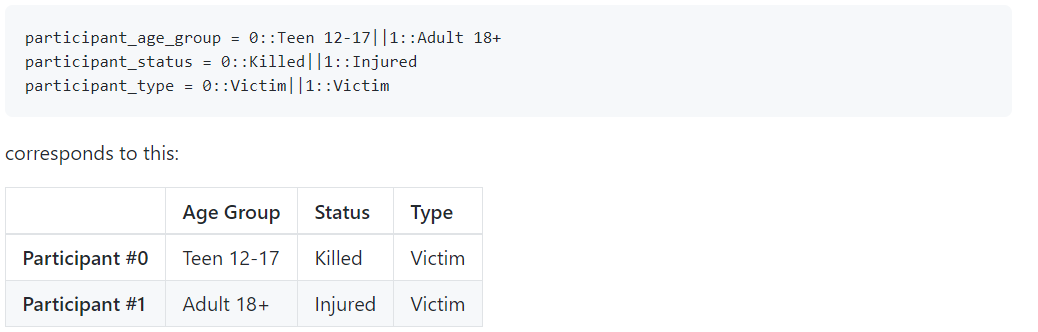

In [4]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [5]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [6]:
df_original = df.copy()

<AxesSubplot:title={'center':'Number of people killed'}, ylabel='Frequency'>

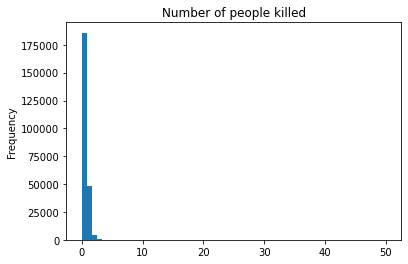

In [17]:
df['n_killed'].plot.hist(title='Number of people killed',bins=60)

In [11]:
killed = df.groupby(df['n_killed']).size()
killed

n_killed
0     185835
1      48436
2       4604
3        595
4        139
5         41
6         11
7          2
8          5
9          3
10         1
11         1
16         1
17         1
27         1
50         1
dtype: int64

In [21]:
injured = df.groupby(df['n_injured']).size()
injured

n_injured
0     142487
1      81986
2      11484
3       2513
4        760
5        241
6         91
7         51
8         19
9         12
10         6
11         4
12         5
13         2
14         3
15         2
16         2
17         2
18         1
19         3
20         1
25         1
53         1
dtype: int64

In [12]:
df['n_killed'].describe()

count    239677.000000
mean          0.252290
std           0.521779
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          50.000000
Name: n_killed, dtype: float64

In [19]:
df['n_killed'].quantile(0.95)

1.0

In [18]:
df['n_injured'].describe()

count    239677.000000
mean          0.494007
std           0.729952
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          53.000000
Name: n_injured, dtype: float64

In [20]:
df['n_injured'].quantile(0.95)

2.0

<AxesSubplot:title={'center':'Number of people injured'}, ylabel='Frequency'>

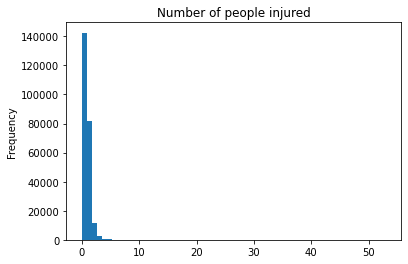

In [16]:
df['n_injured'].plot.hist(title='Number of people injured', bins = 60)

n_injured
0     142487
1      81986
2      11484
3       2513
4        760
5        241
6         91
7         51
8         19
9         12
10         6
11         4
12         5
13         2
14         3
15         2
16         2
17         2
18         1
19         3
20         1
25         1
53         1
dtype: int64

In [12]:
df_nonan = df.dropna(axis =0, subset = ['latitude','longitude'])
df_nonan = df_nonan.reset_index(drop = True)
# df_nonan.index = df_nonan.index.set_names(['Index'])



In [13]:
df_nonan

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231749,1082061,2018-03-31,Washington,Spokane (Spokane Valley),12600 block of N Willow Crest Ln,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.kxly.com/news/domestic-violence-su...,False,...,0::48,0::Adult 18+,0::Male,0::Sean M. Gummow,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,https://www.kxly.com/news/domestic-violence-su...,4.0,4.0
231750,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
231751,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
231752,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108.

In [14]:
# df_nonan[['latitude','longitude']].sort_values(by = ['latitude','longitude'])

In [15]:
# df_nonan.index

In [17]:
#create a zipcode column
# def get_zipcode(df,geolocator, lat_field, long_field):
#     try:
#         location = geolocator.reverse((df[lat_field],df[long_field]))

#         return location.raw['address']['postcode']
#     except(AttributeError,KeyError, ValueError):
#         print(df[lat_field], df[long_field])
#         return None

# geolocator = geopy.Nominatim(user_agent ='pacoramirez2010@hotmail.com')

# zipcodes = df_nonan.apply(get_zipcode, axis=1, geolocator = geolocator, lat_field ='latitude', long_field = 'longitude')

# print(zipcodes)
from uszipcode import SearchEngine
from uszipcode import Zipcode
search = SearchEngine(simple_zipcode = True)

def get_zipcode(lat,lon):
    try:
        result = search.by_coordinates(lat = lat, lng = lon, returns = 1)
        return result[0].zipcode
    except IndexError:
        return None


In [17]:
#  get_zipcode(df_nonan, geolocator, df_nonan.iloc[0]['latitude'],df_nonan.iloc[0]['longitude'])

In [18]:
 get_zipcode(df_nonan.iloc[0]['latitude'],df_nonan.iloc[0]['longitude'])

'15132'

In [20]:
df_nonan.loc[387]['latitude'].dtype

dtype('float64')

In [22]:
zipcodes = []
for x in range(0,388):
    a = get_zipcode(df_nonan.iloc[x]['latitude'], df_nonan.iloc[x]['longitude'])
    zipcodes.append(a)
    
zipcodes 

['15132',
 '90249',
 '44055',
 '80013',
 '27409',
 '74130',
 '87105',
 '70113',
 '94531',
 '21223',
 '37404',
 '63120',
 '70544',
 '20002',
 '45502',
 '38115',
 '95993',
 '60649',
 '70139',
 '94590',
 '19801',
 '84047',
 '92840',
 '74115',
 '49503',
 '93534',
 '31206',
 '71108',
 '31768',
 '48601',
 '93620',
 '46219',
 '39204',
 '64137',
 '20001',
 '92057',
 '13350',
 '95351',
 '95632',
 '95205',
 '33476',
 '60620',
 '64112',
 '11224',
 '95301',
 '98002',
 '29649',
 '10470',
 '90805',
 '19133',
 '94589',
 '85029',
 '40505',
 '44310',
 '98003',
 '60621',
 '70058',
 '62082',
 '44074',
 '32686',
 '28215',
 '19094',
 '38301',
 '21218',
 '07108',
 '27577',
 '94303',
 '15901',
 '90501',
 '47232',
 '19138',
 '07302',
 '85119',
 '70116',
 '45232',
 '08075',
 '48204',
 '19142',
 '11436',
 '23974',
 '38132',
 '48201',
 '60651',
 '37881',
 '93305',
 '48502',
 '23661',
 '38114',
 '60602',
 '30314',
 '53206',
 '94589',
 '46205',
 '23452',
 '30241',
 '90404',
 '17401',
 '63113',
 '60621',
 '27260',


In [ ]:

# df_nonan

#https://stackoverflow.com/questions/59121678/reverse-geocoding-for-pandas-dataframe

In [ ]:
# zipcodes = []
# for row in df_nonan['Index']:
#     a= get_zipcode(df_nonan[df_nonan['Index']== row]['latitude'],df_nonan[df_nonan['Index']== row]['longitude'])
#     zipcodes.append(a)
    
# zipcodes

In [23]:

df_nonan['zipcode'] = df_nonan.apply(lambda x: get_zipcode(x['latitude'],x['longitude']), axis =1)
df_nonan

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,zipcode
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,15132
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,90249
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,44055
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,80013
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,27409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231749,1082061,2018-03-31,Washington,Spokane (Spokane Valley),12600 block of N Willow Crest Ln,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.kxly.com/news/domestic-violence-su...,False,...,0::Adult 18+,0::Male,0::Sean M. Gummow,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,https://www.kxly.com/news/domestic-violence-su...,4.0,4.0,99216
231750,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,71457
231751,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,70114
231752,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,0::Adult 18+,0:

In [28]:
df_nonan.to_csv(r'C:\Users\emili\Documents\DS4A\Capstone_Project\Guns\Team97_DS4A\Data\zipcode_nonan.csv')

In [8]:
with open('Data/zipcode_nonan.csv',encoding='Latin1') as f:
    df2=pd.read_csv(f, delimiter=',')

In [9]:
df2

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,zipcode
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,15132.0
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,90249.0
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,44055.0
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,80013.0
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,27409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231749,231749,1082061,2018-03-31,Washington,Spokane (Spokane Valley),12600 block of N Willow Crest Ln,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.kxly.com/news/domestic-violence-su...,...,0::Adult 18+,0::Male,0::Sean M. Gummow,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,https://www.kxly.com/news/domestic-violence-su...,4.0,4.0,99216.0
231750,231750,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,71457.0
231751,231751,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,...,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,70114.0
231752,231752,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,...,0::Adult 18+,0::Male,0::Leroy El

In [10]:
df2['zipcode'].dtypes

dtype('float64')

In [11]:
df2 = df2.dropna(axis =0, subset = ['zipcode'])
df2 = df2.reset_index(drop = True)
df2['zipcode'] = df2['zipcode'].astype(int)
df2
# df2.sort_values(by=['zipcode'], ascending =False)


,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,zipcode
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,15132
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,90249
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,44055
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,80013
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,27409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231476,231749,1082061,2018-03-31,Washington,Spokane (Spokane Valley),12600 block of N Willow Crest Ln,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.kxly.com/news/domestic-violence-su...,...,0::Adult 18+,0::Male,0::Sean M. Gummow,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,https://www.kxly.com/news/domestic-violence-su...,4.0,4.0,99216
231477,231750,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,71457
231478,231751,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,...,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,70114
231479,231752,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,...,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Kille

In [12]:
#This is the zipcodes associated with incident IDs
zipcodes_df = df2[['incident_id','zipcode']]

In [13]:
zipcodes_df

,incident_id,zipcode
0,461105,15132
1,460726,90249
2,478855,44055
3,478925,80013
4,478959,27409
...,...,...
231476,1082061,99216
231477,1083139,71457
231478,1083151,70114
231479,1082514,77082


In [14]:
with open('Data/CLEAN.csv',encoding='Latin1') as f:
    df=pd.read_csv(f, delimiter=',')

C:\Users\emili\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
clean_df = df

In [16]:
clean_df.head()

,incident_id,age,type,gender,status,date,state
0,461105,20.0,Victim,Male,Arrested,1/1/2013,Pennsylvania
1,460726,20.0,Victim,Male,Killed,1/1/2013,California
2,478855,25.0,Subject-Suspect,Male,"Injured, Unharmed, Arrested",1/1/2013,Ohio
3,478925,29.0,Victim,Female,Killed,1/5/2013,Colorado
4,478959,18.0,Victim,Female,Injured,1/7/2013,North Carolina


In [17]:
clean_df.dtypes

incident_id      int64
age            float64
type            object
gender          object
status          object
date            object
state           object
dtype: object

In [18]:
df['date'].sort_values()

0         1/1/2013
1         1/1/2013
2         1/1/2013
357       1/1/2014
356       1/1/2014
            ...   
413658         NaN
413659         NaN
413660         NaN
413661         NaN
413662         NaN
Name: date, Length: 413663, dtype: object

In [19]:
clean_df['date'] = pd.to_datetime(clean_df['date'],format ='%m/%d/%Y')
clean_df['Year'] = pd.DatetimeIndex(clean_df['date']).year
clean_df['Year'].sort_values()

0         2013.0
176       2013.0
177       2013.0
178       2013.0
179       2013.0
           ...  
413658       NaN
413659       NaN
413660       NaN
413661       NaN
413662       NaN
Name: Year, Length: 413663, dtype: float64

In [20]:
clean_nonan = clean_df.dropna(axis =0, subset = ['Year','state'])
clean_nonan = clean_nonan.reset_index(drop = True)
clean_nonan['Year'] = clean_nonan['Year'].astype(int)
clean_nonan['state'] = clean_nonan['state'].astype(str)

In [21]:
clean_nonan.head()

,incident_id,age,type,gender,status,date,state,Year
0,461105,20.0,Victim,Male,Arrested,2013-01-01,Pennsylvania,2013
1,460726,20.0,Victim,Male,Killed,2013-01-01,California,2013
2,478855,25.0,Subject-Suspect,Male,"Injured, Unharmed, Arrested",2013-01-01,Ohio,2013
3,478925,29.0,Victim,Female,Killed,2013-01-05,Colorado,2013
4,478959,18.0,Victim,Female,Injured,2013-01-07,North Carolina,2013


In [22]:
clean_nonan.dtypes

incident_id             int64
age                   float64
type                   object
gender                 object
status                 object
date           datetime64[ns]
state                  object
Year                    int32
dtype: object

In [23]:
with open('Data/ACS_2013-2019_Cleaning.csv',encoding='Latin1') as f:
    df=pd.read_csv(f, delimiter=',')

In [24]:
census_state_df = df
census_state_df = census_state_df.rename(columns ={"Geographic Area Name":"state","Estimate!!SEX AND AGE!!Total population":"Total Population","Estimate!!SEX AND AGE!!Total population!!Male":"Male Population","Percent!!SEX AND AGE!!Total population!!Male":"Percent Male Population","Estimate!!SEX AND AGE!!Total population!!Female":"Female Population","Percent!!SEX AND AGE!!Total population!!Female":"Percent Female Population"})
census_state_df.head()

,id,Year,state,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population
0,1,2019,Alabama,4903185,2369611,48.3,2533574,51.7
1,2,2019,Alaska,731545,380433,52.0,351112,48.0
2,3,2019,Arizona,7278717,3620935,49.7,3657782,50.3
3,4,2019,Arkansas,3017804,1474705,48.9,1543099,51.1
4,5,2019,California,39512223,19640794,49.7,19871429,50.3


In [25]:
census_state_df.dtypes

id                             int64
Year                           int64
state                         object
Total Population               int64
Male Population                int64
Percent Male Population      float64
Female Population              int64
Percent Female Population    float64
dtype: object

In [27]:
census_state_df['state'].sort_values()

0      Alabama
312    Alabama
52     Alabama
208    Alabama
156    Alabama
        ...   
258    Wyoming
310    Wyoming
102    Wyoming
362    Wyoming
154    Wyoming
Name: state, Length: 364, dtype: object

In [30]:
merged_df = pd.merge(clean_nonan,
                     census_state_df[['Year','state','Total Population','Male Population',
                                      'Percent Male Population','Female Population','Percent Female Population']], 
                     on =['state','Year'])

In [31]:
merged_df

,incident_id,age,type,gender,status,date,state,Year,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population
0,461105,20.0,Victim,Male,Arrested,2013-01-01,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
1,484268,21.0,Victim,Female,Killed,2013-04-09,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
2,485885,17.0,Victim,Male,Killed,2013-04-28,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
3,486068,NaN,Victim,Male,Injured,2013-05-06,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
4,486121,15.0,Victim,Male,Injured,2013-05-11,Pennsylvania,2013,12731381,6211805,48.8,6519576,51.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1073419,49.0,Victim,Male,Killed,2018-03-18,Wyoming,2018,581836,296979,51.0,284857,49.0
239673,1076613,NaN,Subject-Suspect,Male,Killed,2018-03-19,Wyoming,2018,581836,296979,51.0,284857,49.0
239674,1074675,20.0,Subject-Suspect,Male,"Unharmed, Arrested",2018-03-21,Wyoming,2018,581836,296979,51.0,284857,49.0
239675,1076607,86.0,Subject-Suspect,Male,Killed,2018-03-22,Wyoming,2018,581836,296979,51.0,284857,49.0


In [39]:
states_total_incidents=merged_df.groupby(['state','Year']).size()
states_total_incidents_df=pd.DataFrame(states_total_incidents)
states_total_incidents_df.rename(columns = {0:"Incidents"},inplace =True)
states_total_incidents_df.head(10)

Incidents
state   Year           
Alabama 2013          2
        2014       1318
        2015       1034
        2016       1309
        2017       1461
        2018        347
Alaska  2014        146
        2015        380
        2016        445
        2017        317

In [ ]:
states_total_incidents_df['accidents_per_100,000_weighted']  = states_total_incidents_df.apply(lambda x: x['Incidents']/borough_data[x['BOROUGH']]['area'], axis = 1) 